<a href="https://colab.research.google.com/github/ujjwalsharma07-og/Python/blob/main/walmart_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the data



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the data

In [11]:
df = pd.read_csv("walmart_data.csv")

#Basic analysis of data

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.isnull()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,False
550064,False,False,False,False,False,False,False,False,False,False
550065,False,False,False,False,False,False,False,False,False,False
550066,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


#For statistical analysis

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.describe(include="object")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


#exploratory data analysis. (EDA)  

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
550063,False
550064,False
550065,False
550066,False


In [ ]:
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


In [ ]:
df["Gender"].value_counts()

,count
Gender,
M,414259
F,135809


In [ ]:
df["Gender"].value_counts(normalize=True)

,proportion
Gender,
M,0.753105
F,0.246895


In [ ]:
df["Purchase"].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [ ]:
df["Age"].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [ ]:
df.groupby(by = "Gender")["User_ID"].nunique()

,User_ID
Gender,
F,1666
M,4225


In [ ]:
df.groupby(by = "Gender")["Purchase"].describe().T

Gender,F,M
count,135809.000000,414259.00000
mean,8734.565765,9437.52604
std,4767.233289,5092.18621
min,12.000000,12.00000
25%,5433.000000,5863.00000
50%,7914.000000,8098.00000
75%,11400.000000,12454.00000
max,23959.000000,23961.00000


<Axes: xlabel='Gender', ylabel='Purchase'>

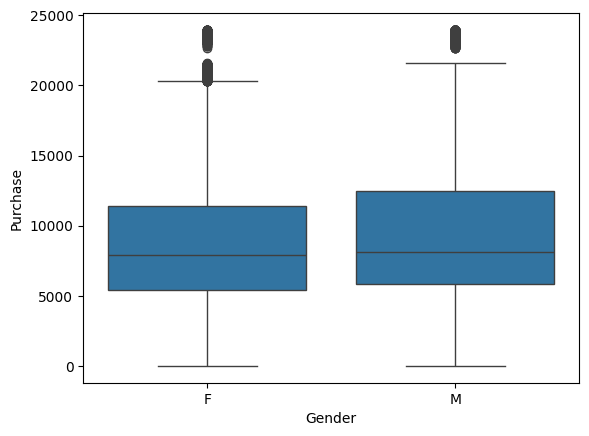

In [12]:
sns.boxplot(x = "Gender" , y= "Purchase" , data = df)

<!-- The Boxplot illustrates
*more outlier in female.
*median is almost same for both male and femail.
*Male distribution is slightly more spreaded than femail.   -->

#The boxplot illustrated.
* The purchases of both the genders.
* More outlier in female.
* Median is almost same.
* Male spread is slightly more than femail.

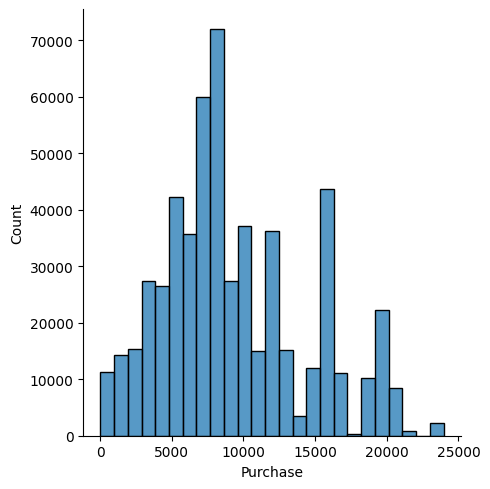

In [18]:
sns.displot(df, x="Purchase", bins=25)

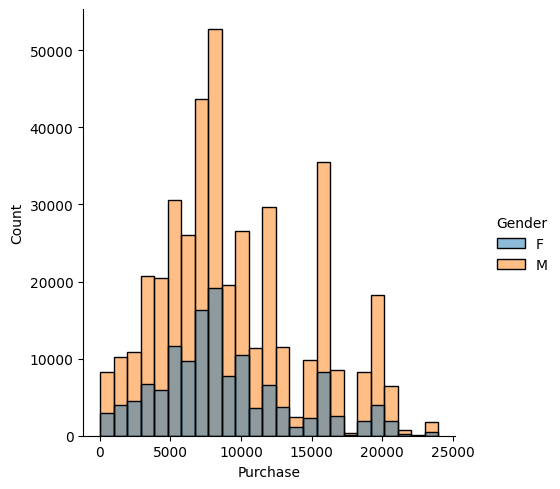

In [21]:
sns.displot(df, x="Purchase" , hue = "Gender" , bins=25)

In [22]:
df.groupby("Gender")['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [23]:
df.sample(300).groupby("Gender")['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,73.0,8409.931507,4574.871526,237.0,5270.0,8010.0,10009.0,19547.0
M,227.0,9093.171806,4905.738674,14.0,5358.0,8035.0,11830.5,23508.0


In [24]:
df.sample(300).groupby("Gender")['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,82.0,8805.878049,4334.845808,1485.0,6031.0,8173.5,9950.25,20300.0
M,218.0,9608.605505,5189.321947,50.0,5942.0,7991.0,12658.75,23928.0


In [25]:
sample_size = 300
n = 1500

male_sample_means = [df[df["Gender"] == "M"]["Purchase"].sample(sample_size).mean() for i in range(n)]

In [26]:
female_sample_means = [df[df["Gender"] == "F"]["Purchase"].sample(sample_size).mean() for i in range(n)]

In [27]:
np.mean(male_sample_means) , np.mean(female_sample_means)

(np.float64(9437.052102222222), np.float64(8736.558242222221))

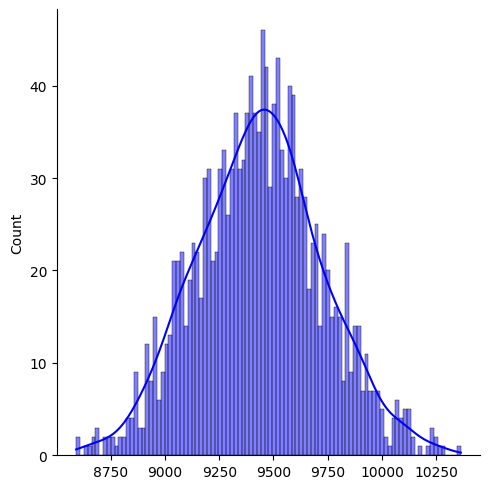

In [31]:
sns.displot(male_sample_means, kde=True, bins=100, color='blue')

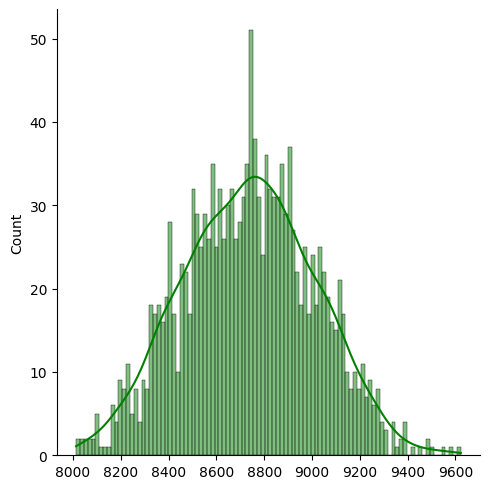

In [34]:
sns.displot(female_sample_means, kde=True, bins=100, color='green')

In [42]:
#95% CI
z = 1.96

lower_limit_male = np.mean(male_sample_means) - z * np.std(male_sample_means) / np.sqrt(n)
upper_limit_male = np.mean(male_sample_means) + z * np.std(male_sample_means) / np.sqrt(n)


In [43]:
lower_limit_male , upper_limit_male

(np.float64(9422.406557444936), np.float64(9451.697646999508))

In [44]:
lower_limit_female = np.mean(female_sample_means) - z * np.std(female_sample_means) / np.sqrt(n)
upper_limit_female = np.mean(female_sample_means) + z * np.std(female_sample_means) / np.sqrt(n)

In [45]:
lower_limit_female , upper_limit_female

(np.float64(8722.649901325763), np.float64(8750.46658311868))

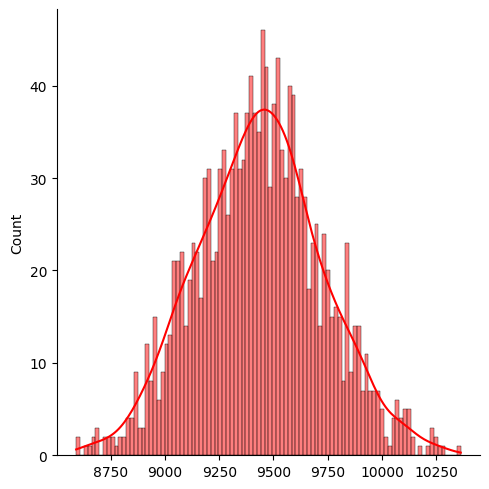

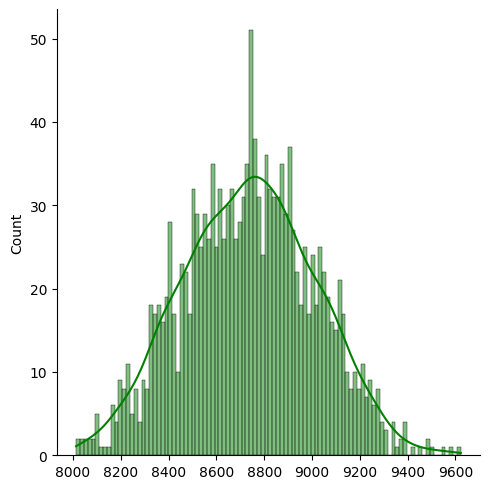

In [46]:
sns.displot(male_sample_means, kde=True, bins=100, color='r')
sns.displot(female_sample_means, kde=True, bins=100, color='g')

 The overlaping is creating difficulty to understand if there is any pattern or trend for each gender.

1. This column has no Eliminatory factor.  Need to try other columns.
2. Increase the sample size to check if there is any better result.

**Question** 5 - confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?

**Solution** -- Confidence Interval Analysis
Male Customers' 95% Confidence Interval: [9422.4, 9451.6]

Female Customers' 95% Confidence Interval: [8722.6, 8750.4]

No, the confidence intervals do not overlap.

The upper bound for females (8750.4) is less than the lower bound for males (9422.4).

This means that, with 95% confidence, we can conclude that male customers spend more on average than female customers.


The fact that the confidence intervals do not overlap indicates a statistically significant difference in the average spending between genders. This is not due to random chance — there is real evidence that males spend more than females.

According to my observatuion Walmart can

*Increase average transaction values.

*Enhance customer satisfaction with personalized experiences.

*Improve inventory planning and sales conversion.

**Question** -7 Give recommendations and action items to Walmart.



**Recommendations & Action Items for Walmart**


**Leverage Higher Spending Among Male Customers**:

targete on products popular with men (electronics, tools, sports gear).

Implement upselling and cross-selling strategies focused on male shopping habits.

come-up with exciting offers with increase and repeat the purchases for male customers.

**Boost Female Customer Spending**:

Conduct surveys or focus groups to understand female spending drivers and barriers.

Give more recommendations and discounts tailored for women.

Expand and optimize product assortment to better meet female customers’ preferences.

**Optimize Inventory and Merchandising:**

Adjust stock levels based on higher demand from male customers in key categories.

Use data to refine product placement and promotional displays for different genders.

**Enhance Customer Experience Through Personalization:**

Implement product recommendations based on gender and purchase history.

Send targeted communications with gender-specific promotions and product updates.